# IMAGE CLASSIFICATION USING CNN on CIFAR-10 DATASET

## Importing necessary libraries

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## Loading and Splitting CIFAR-10 dataset into training and testing 

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

## Present classes in dataset

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

## Plotting images 

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

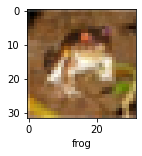

In [11]:
plot_sample(X_train,y_train,0)

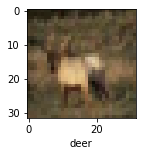

In [31]:
plot_sample(X_train,y_train,3)

## Normalizing the training data

In [13]:
X_train = X_train/255.0
X_test = X_test/255.0

## Building simple artificial neural network for image classification

In [14]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [15]:
ann.compile(optimizer = 'SGD',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [16]:
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.8103 - accuracy: 0.3554
Epoch 2/5
1563/1563 [==============================] - 115s 74ms/step - loss: 1.6212 - accuracy: 0.4283
Epoch 3/5
1563/1563 [==============================] - 115s 73ms/step - loss: 1.5406 - accuracy: 0.4553
Epoch 4/5
1563/1563 [==============================] - 115s 73ms/step - loss: 1.4826 - accuracy: 0.4799
Epoch 5/5
1563/1563 [==============================] - 115s 73ms/step - loss: 1.4306 - accuracy: 0.4963


### As we can see above that at the end of 5 epochs, accuracy is approx 50%

In [17]:
import sklearn as sk
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes= [np.argmax(element) for element in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.34      0.80      0.48      1000
           1       0.74      0.35      0.47      1000
           2       0.42      0.32      0.36      1000
           3       0.39      0.27      0.32      1000
           4       0.48      0.35      0.40      1000
           5       0.44      0.29      0.35      1000
           6       0.62      0.39      0.48      1000
           7       0.43      0.63      0.51      1000
           8       0.68      0.48      0.56      1000
           9       0.45      0.69      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



## Building a CNN to train our images

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.4898 - accuracy: 0.4635
Epoch 2/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.1393 - accuracy: 0.5986
Epoch 3/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.0143 - accuracy: 0.6452
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9315 - accuracy: 0.6752
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8765 - accuracy: 0.6969
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8198 - accuracy: 0.7140
Epoch 7/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7847 - accuracy: 0.7285
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7432 - accuracy: 0.7394
Epoch 9/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7092 - accuracy: 0.7504
Epoch 10/10
1563/1563 [==============================] - 61s 39m

### And now we can see that With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN.
### CNN's are best for image classification and gives superb accuracy.
### Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.9663 - accuracy: 0.6819


[0.9662547707557678, 0.6819000244140625]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.9666373e-03, 6.2483605e-03, 7.4468660e-03, 8.6076486e-01,
        6.4561704e-05, 6.3236724e-03, 2.0454777e-03, 3.3655563e-06,
        9.0380356e-02, 2.4755806e-02],
       [1.5279992e-03, 6.7504339e-02, 2.6235061e-06, 1.0447659e-07,
        3.2888192e-08, 2.6357716e-10, 7.6770201e-10, 1.8779336e-09,
        9.3092978e-01, 3.5205416e-05],
       [4.3004468e-02, 4.4518623e-01, 1.0699284e-03, 3.3022230e-04,
        1.4492590e-04, 8.6749033e-06, 2.9089411e-05, 6.2020430e-05,
        4.9377355e-01, 1.6390909e-02],
       [4.9038178e-01, 1.1842277e-01, 6.2001768e-02, 2.5072526e-03,
        5.6448732e-02, 1.1146453e-05, 1.4329831e-04, 8.4386345e-05,
        2.6957458e-01, 4.2427733e-04],
       [2.9461421e-07, 2.0429219e-05, 2.6042880e-03, 3.4695327e-02,
        4.2296532e-01, 6.1393483e-04, 5.3909051e-01, 7.6474890e-08,
        9.6202348e-06, 2.0546624e-07]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

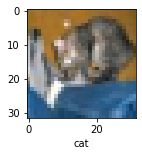

In [57]:
plot_sample(X_test, y_test,0)

#### As the above image is  of an Airplane, lets predict its class

In [58]:
classes[y_classes[0]]

'cat'

#### And it is correct

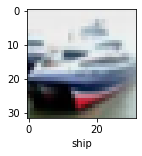

In [59]:
plot_sample(X_test,y_test,1)


In [60]:
classes[y_classes[1]]

'ship'